In [1]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [7]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [2]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [3]:
y_pred

array([3, 2, 1, ..., 4, 1, 2], dtype=int32)

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.cluster_centers_

array([[-1.46893704,  2.28372774],
       [ 0.20667809,  2.25769931],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-2.79290307,  2.79641063]])

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 4, 4], dtype=int32)

In [10]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [11]:
kmeans.inertia_

211.5985372581684

In [12]:
kmeans.score(X)

-211.59853725816836

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, minibatch_kmeans.labels_)

0.6206106892784946

In [18]:
from matplotlib.image import imread
image = imread('ladybug.png')
image.shape

(533, 800, 3)

In [22]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_img

array([[[0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0.09330446, 0.00512582],
        ...,
        [0.26564136, 0.42979804, 0.08111416],
        [0.26564136, 0.42979804, 0.08111416],
        [0.26564136, 0.42979804, 0.08111416]],

       [[0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0.09330446, 0.00512582],
        ...,
        [0.26564136, 0.42979804, 0.08111416],
        [0.26564136, 0.42979804, 0.08111416],
        [0.26564136, 0.42979804, 0.08111416]],

       [[0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0.09330446, 0.00512582],
        ...,
        [0.26564136, 0.42979804, 0.08111416],
        [0.26564136, 0.42979804, 0.08111416],
        [0.26564136, 0.42979804, 0.08111416]],

       ...,

       [[0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0.09330446, 0.00512582],
        [0.01674244, 0

In [23]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

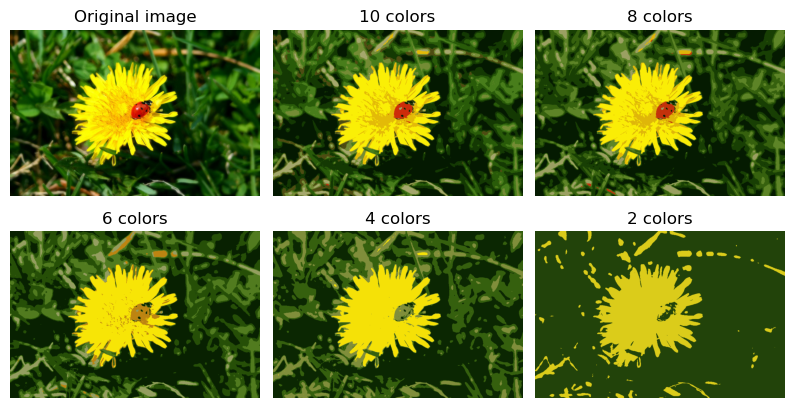

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [26]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

/Users/geonhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [29]:
log_reg.score(X_test, y_test)

0.9711111111111111

In [34]:
from sklearn.pipeline import Pipeline

pipline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression())
])

pipline.fit(X_train, y_train)

/Users/geonhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [31]:
pipline.score(X_test, y_test)

0.9666666666666667

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans=range(2, 100))
grid_clf = GridSearchCV(pipline, param_grid, cv=3, verbose=2)

In [37]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

0.8555555555555555

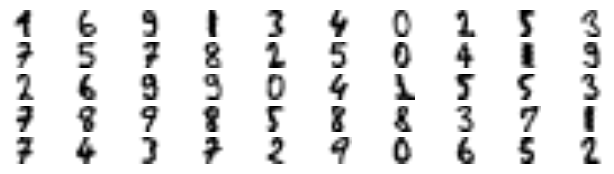

In [38]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [39]:
y_train[representative_digit_idx]

array([1, 6, 9, 1, 3, 4, 0, 2, 5, 3, 7, 5, 7, 8, 2, 5, 0, 4, 1, 9, 2, 6,
       9, 9, 0, 4, 1, 5, 5, 3, 7, 8, 9, 8, 5, 8, 8, 3, 7, 1, 7, 4, 3, 7,
       2, 9, 0, 6, 5, 2])

In [40]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 2, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [43]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.10222222222222223

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5).fit(X)

In [45]:
dbscan.labels_

array([ 0,  1,  2,  0,  0,  3,  4,  2,  3,  0,  3,  5,  3,  0,  2,  3,  2,
        0,  2,  3,  0,  3,  3,  0,  4,  2,  2,  5,  6,  2,  0,  0,  6,  7,
        3,  0,  3,  3,  1,  6,  1,  3,  3,  2,  3,  2,  3,  7,  3,  3,  3,
        3,  5, -1,  0,  2,  3,  3,  2,  3,  3,  0, -1,  4,  7,  3,  6,  0,
        5,  3,  3,  0,  6,  3,  3,  3,  1,  7,  3,  2,  5,  2,  4,  2,  0,
        4,  3,  8,  3,  2,  0,  4,  4,  3,  2,  5, -1,  7,  3,  0,  1,  4,
        3,  0,  2,  5,  6,  3,  3,  3, -1,  0,  0,  3,  2,  6,  2,  2, -1,
        3,  0,  6,  3,  0,  0,  0,  0,  6,  3,  1,  7,  6, -1,  3,  4,  2,
        5,  4,  1,  3,  3,  3,  6,  6,  3,  2,  2, -1,  3,  2,  6,  0,  3,
        0,  2,  2,  3,  2,  6,  3,  6, -1,  1,  2,  4,  3,  4,  3,  3,  3,
       -1,  2,  2,  3,  0,  7,  3,  2,  3,  6,  3,  0,  3,  2,  3,  0,  3,
        2,  0, -1,  6,  2,  0,  3,  3,  3, -1,  2, -1,  2,  2, -1,  2,  6,
        3,  2,  3,  0,  3,  2,  3,  3,  3,  0,  3,  0,  7,  3,  3,  7,  2,
        4,  0, -1,  0,  5

In [46]:
len(dbscan.core_sample_indices_)

785

In [47]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  11,  12,  13,  14,
        15,  17,  18,  20,  21,  22,  23,  24,  25,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  54,  55,  56,  57,  58,  59,
        60,  61,  63,  65,  66,  67,  68,  69,  70,  71,  72,  73,  76,
        77,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  94,  95,  97,  98, 102, 103, 105, 106, 107, 108, 109,
       111, 112, 113, 114, 115, 116, 119, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 143, 144, 145, 146, 149, 150, 151, 152, 153, 156, 157, 159,
       162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175,
       176, 177, 178, 180, 182, 183, 184, 186, 187, 188, 190, 191, 193,
       195, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 215, 217, 218, 219, 220, 221, 222, 224, 225, 22

In [49]:
dbscan.components_

array([[ 0.08355367,  0.95883855],
       [ 0.08188139,  0.34971762],
       [-0.39180072,  0.96226352],
       ...,
       [-0.946484  ,  0.40696956],
       [ 0.59246489,  0.83861024],
       [ 0.01842773,  0.03665368]])

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [51]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1,-0.1], [2, 1]])
knn.predict(X_new)

array([2, 1, 5, 3])

In [53]:
knn.predict_proba(X_new)

array([[0.  , 0.02, 0.72, 0.  , 0.26, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.5 , 0.  , 0.  , 0.36, 0.  , 0.  , 0.  , 0.  , 0.04],
       [0.  , 0.  , 0.  , 0.34, 0.  , 0.54, 0.06, 0.  , 0.06, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])